Автор: Лейман Максим  

Дата создания: 18.06.2025

# Промежуточная аттестация 4.  

## Поиск ключевых точек лица



In [1]:
!ls dataset/dataset_3

test	    test.csv  train.csv       training_renamed.csv
test_0.csv  train     training_0.csv


# Импорты

In [2]:
from train.trainer import train
from data.dataset import FaceKeypointsDataset, annotation_transform, rename_images_and_update_csv, convert_xml_to_csv_with_renaming
from utils.visualization import img_show, show_batch_with_keypoints, show_image_with_predictions, show_original_image_with_predictions
from models.keypoint_net import KeypointNet



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from skimage import io
import torch
from torch.utils.data import Dataset, DataLoader



# 1) Датасет

## Преобразование аннотаций  

приведение аннотаций к одному виду

In [3]:
# annotation_transform(patch_in='dataset/dataset_2/annotations.xml', path_out='dataset/dataset_2/training.csv')


## Преобразование  названий изображений  

для совместного использования 

In [4]:
# Преобразование названий изображений 
# convert_xml_to_csv_with_renaming(
#     image_folder='dataset/dataset_2/images',
#     xml_path='dataset/dataset_2/annotations.xml',
#     csv_out_path='dataset/dataset_2/training_2.csv',
#     image_prefix=8000
# )


In [5]:
# rename_images_and_update_csv(
#     image_folder='dataset/dataset_4/train',
#     csv_path='dataset/dataset_4/train.csv',
#     csv_out_path='dataset/dataset_4/train_renamed.csv',
#     start_index=10000,
#     image_ext='.jpg'
# )


## Просмотр Изображений

#### Просмотр первого датасета

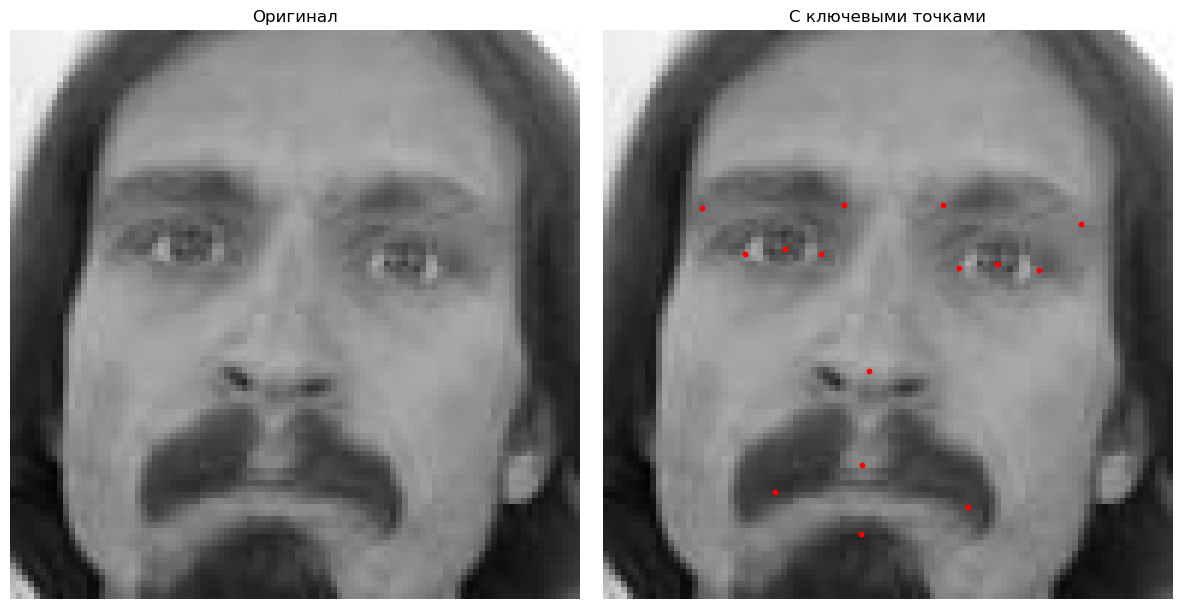

In [6]:
path_annotation='dataset/dataset_1/training.csv'
path_image='dataset/dataset_1/images'
img_show(path_image, path_annotation, 0)

#### Просмотр второго датасета 

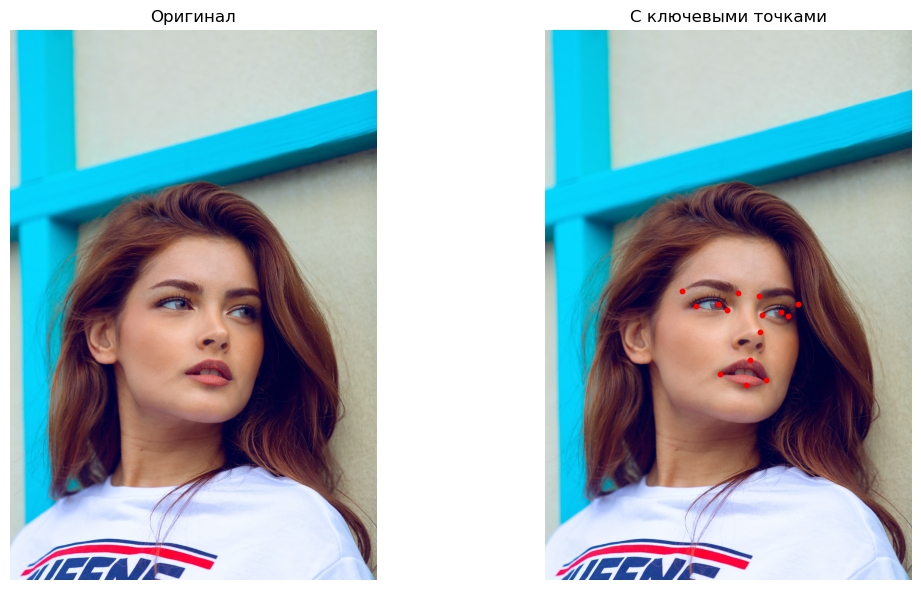

In [7]:
path_annotation='dataset/dataset_2/training.csv'
path_image='dataset/dataset_2/images'
img_show(path_image, path_annotation, 0)

#### Просмотр третьего датасета

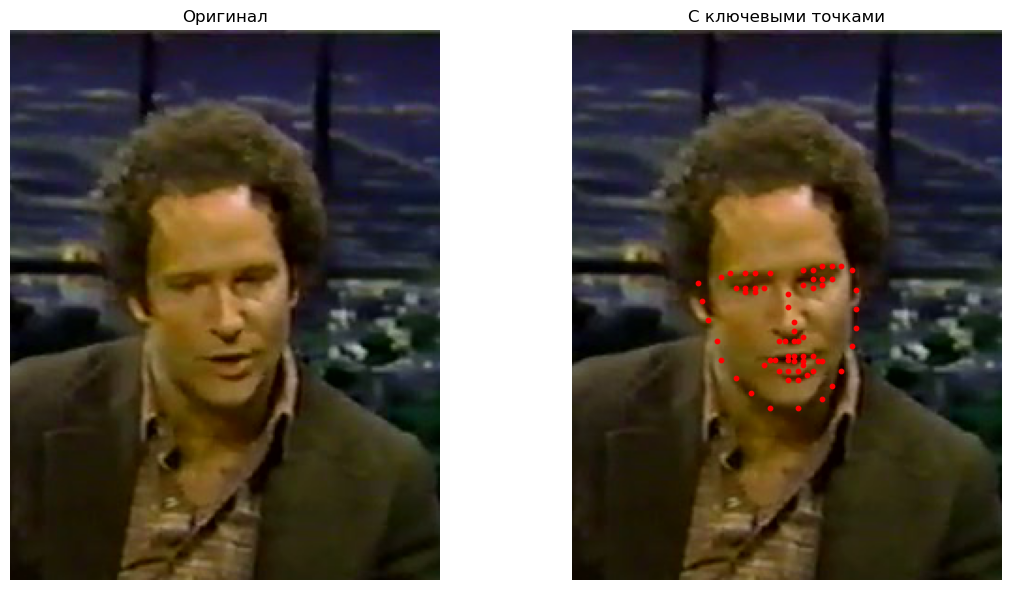

In [8]:
path_annotation='dataset/dataset_3/train.csv'
path_image='dataset/dataset_3/train'
img_show(path_image, path_annotation, 5)

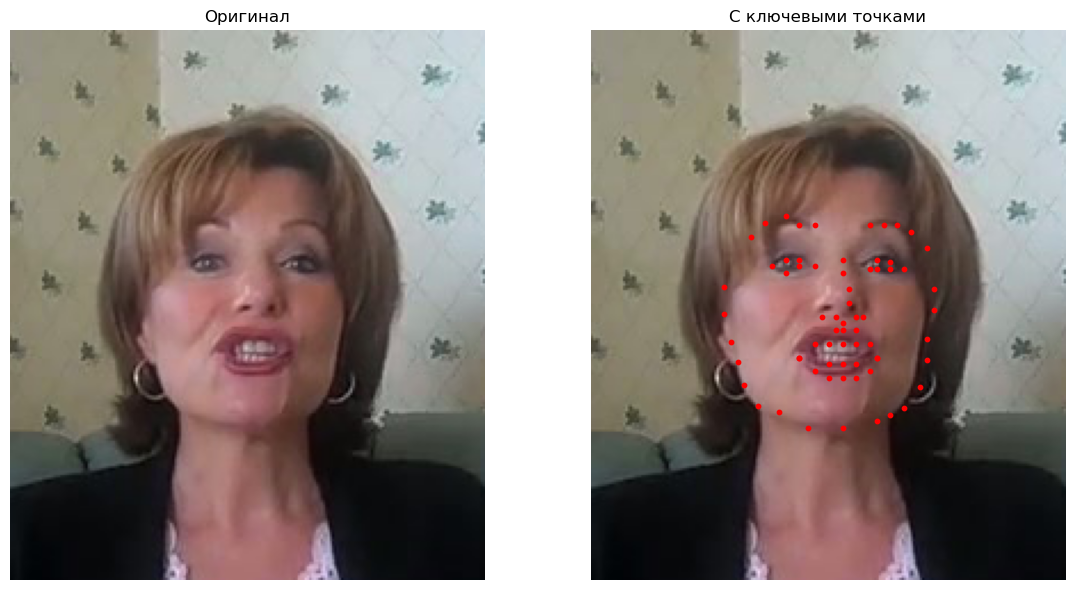

In [9]:
path_annotation='dataset/dataset_3/test.csv'
path_image='dataset/dataset_3/test'
img_show(path_image, path_annotation, 10)

## Загрузка с датасета

In [ ]:
from torchvision import transforms

imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),    # [0,1]
    # transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

path_annotation='dataset/dataset_3/train.csv'
path_image='dataset/dataset_3/train'

train_dataset = FaceKeypointsDataset(
    csv_file=path_annotation,
    root_dir=path_image,
    transform=transform
)

path_annotation='dataset/dataset_3/test.csv'
path_image='dataset/dataset_3/test'

val_dataset = FaceKeypointsDataset(
    csv_file=path_annotation,
    root_dir=path_image,
    transform=transform
)

# DataLoader для обучения
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)

# DataLoader для обучения
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=0)


### Просмотр датасета с даталоадера

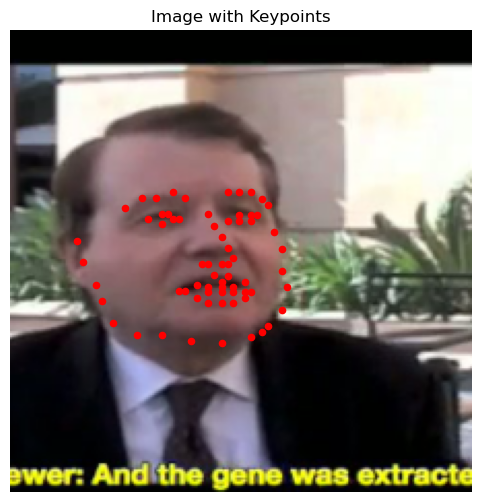

In [11]:
batch = next(iter(train_loader))

show_batch_with_keypoints(batch, batch_idx=0)

# 2) Модель

In [12]:
import pandas as pd

df = pd.read_csv('dataset/dataset_3/train.csv')
num_columns = len(df.columns)
num_keypoints = (num_columns - 1) // 2  # -1 за счет столбца с именем изображения

print(f'Количество ключевых точек: {num_keypoints}')

Количество ключевых точек: 68


In [13]:
num_keypoints = 68  
model = KeypointNet(num_keypoints=num_keypoints)

# 3) Тренировка

Epoch 1/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.57it/s]


Epoch 1/40 | Train Loss: 1.7270 | Val Loss: 3.4619
Сохранена лучшая модель на эпохе  1 с val loss 3.4619


Epoch 2/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.61it/s]


Epoch 2/40 | Train Loss: 1.4117 | Val Loss: 3.3619
Сохранена лучшая модель на эпохе  2 с val loss 3.3619


Epoch 3/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.52it/s]


Epoch 3/40 | Train Loss: 1.3846 | Val Loss: 4.4673


Epoch 4/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.59it/s]


Epoch 4/40 | Train Loss: 1.7859 | Val Loss: 3.4575


Epoch 5/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.57it/s]


Epoch 5/40 | Train Loss: 1.4407 | Val Loss: 3.6280


Epoch 6/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.51it/s]


Epoch 6/40 | Train Loss: 1.3285 | Val Loss: 3.1905
Сохранена лучшая модель на эпохе  6 с val loss 3.1905


Epoch 7/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  8.82it/s]


Epoch 7/40 | Train Loss: 1.5318 | Val Loss: 3.4424


Epoch 8/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.43it/s]


Epoch 8/40 | Train Loss: 1.4040 | Val Loss: 3.6325


Epoch 9/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.28it/s]


Epoch 9/40 | Train Loss: 1.3751 | Val Loss: 3.3990


Epoch 10/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.56it/s]


Epoch 10/40 | Train Loss: 1.6979 | Val Loss: 4.1569


Epoch 11/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.30it/s]


Epoch 11/40 | Train Loss: 1.7982 | Val Loss: 5.3178


Epoch 12/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.53it/s]


Epoch 12/40 | Train Loss: 2.0006 | Val Loss: 3.2718


Epoch 13/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.41it/s]


Epoch 13/40 | Train Loss: 1.3570 | Val Loss: 3.0777
Сохранена лучшая модель на эпохе  13 с val loss 3.0777


Epoch 14/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.28it/s]


Epoch 14/40 | Train Loss: 1.2750 | Val Loss: 3.0297
Сохранена лучшая модель на эпохе  14 с val loss 3.0297


Epoch 15/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.29it/s]


Epoch 15/40 | Train Loss: 1.2086 | Val Loss: 3.0817


Epoch 16/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.36it/s]


Epoch 16/40 | Train Loss: 1.2216 | Val Loss: 3.0384


Epoch 17/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.53it/s]


Epoch 17/40 | Train Loss: 1.2366 | Val Loss: 3.1646


Epoch 18/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.53it/s]


Epoch 18/40 | Train Loss: 1.1984 | Val Loss: 3.0751


Epoch 19/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.43it/s]


Epoch 19/40 | Train Loss: 1.2058 | Val Loss: 3.0884


Epoch 20/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.31it/s]


Epoch 20/40 | Train Loss: 1.1750 | Val Loss: 3.0579


Epoch 21/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.38it/s]


Epoch 21/40 | Train Loss: 1.0819 | Val Loss: 3.0172
Сохранена лучшая модель на эпохе  21 с val loss 3.0172


Epoch 22/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.50it/s]


Epoch 22/40 | Train Loss: 1.1083 | Val Loss: 3.0166
Сохранена лучшая модель на эпохе  22 с val loss 3.0166


Epoch 23/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.40it/s]


Epoch 23/40 | Train Loss: 1.0931 | Val Loss: 3.0242


Epoch 24/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  8.84it/s]


Epoch 24/40 | Train Loss: 1.0789 | Val Loss: 2.9908
Сохранена лучшая модель на эпохе  24 с val loss 2.9908


Epoch 25/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.10it/s]


Epoch 25/40 | Train Loss: 1.0801 | Val Loss: 3.0077


Epoch 26/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  8.98it/s]


Epoch 26/40 | Train Loss: 1.0855 | Val Loss: 3.0124


Epoch 27/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.36it/s]


Epoch 27/40 | Train Loss: 1.0829 | Val Loss: 3.0191


Epoch 28/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.26it/s]


Epoch 28/40 | Train Loss: 1.0980 | Val Loss: 3.0954


Epoch 29/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.45it/s]


Epoch 29/40 | Train Loss: 1.0913 | Val Loss: 3.0102


Epoch 30/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.45it/s]


Epoch 30/40 | Train Loss: 1.0754 | Val Loss: 3.0392


Epoch 31/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.59it/s]


Epoch 31/40 | Train Loss: 1.0608 | Val Loss: 3.0142


Epoch 32/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.50it/s]


Epoch 32/40 | Train Loss: 1.0581 | Val Loss: 2.9780
Сохранена лучшая модель на эпохе  32 с val loss 2.9780


Epoch 33/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.44it/s]


Epoch 33/40 | Train Loss: 1.0459 | Val Loss: 3.0147


Epoch 34/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.30it/s]


Epoch 34/40 | Train Loss: 1.0535 | Val Loss: 2.9944


Epoch 35/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.19it/s]


Epoch 35/40 | Train Loss: 1.0438 | Val Loss: 2.9761
Сохранена лучшая модель на эпохе  35 с val loss 2.9761


Epoch 36/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.51it/s]


Epoch 36/40 | Train Loss: 1.0396 | Val Loss: 3.0065


Epoch 37/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.09it/s]


Epoch 37/40 | Train Loss: 1.0309 | Val Loss: 2.9704
Сохранена лучшая модель на эпохе  37 с val loss 2.9704


Epoch 38/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.23it/s]


Epoch 38/40 | Train Loss: 1.0279 | Val Loss: 3.0211


Epoch 39/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.14it/s]


Epoch 39/40 | Train Loss: 1.0328 | Val Loss: 2.9954


Epoch 40/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.37it/s]


Epoch 40/40 | Train Loss: 1.0274 | Val Loss: 2.9834


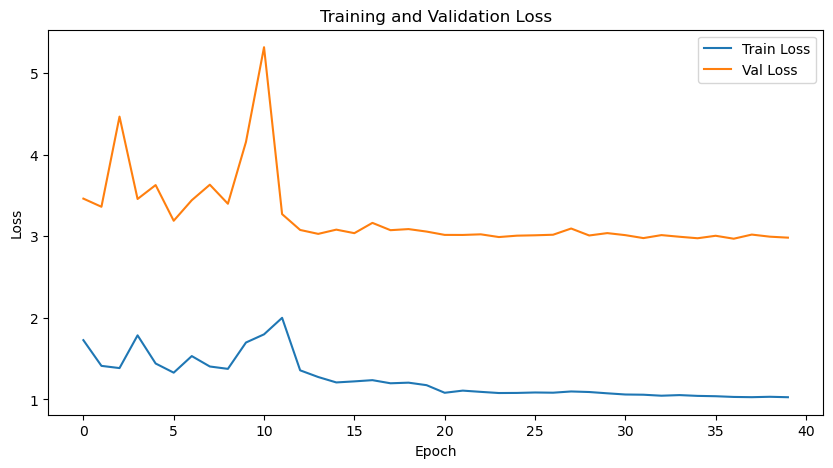

In [14]:
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('best_model.pth', map_location='cpu'))
model.to(device)
optimizer = Adam(model.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)  
criterion = torch.nn.MSELoss()

trained_model, train_losses, val_losses = train(
    model, train_loader, val_loader, optimizer, criterion, scheduler, device, num_epochs=40, save_path='best_model.pth'
)


#  Работа модели детекции точек

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('best_model.pth', map_location='cpu')) 

model.eval()
model.to(device);

path_image = 'dataset/dataset_3/test/15096.jpg'

torch.Size([3, 224, 224])


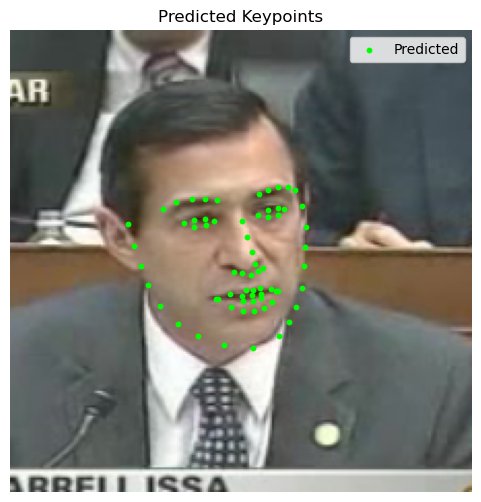

In [19]:
# Визуализация
show_image_with_predictions(path_image, model, device)


torch.Size([3, 224, 224])


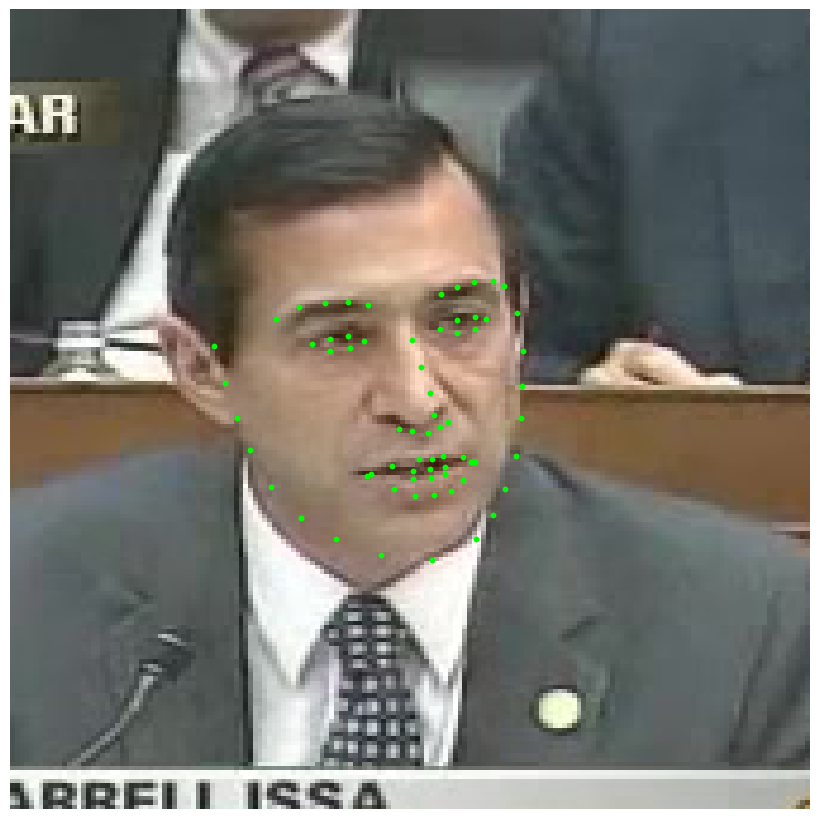

In [20]:
show_original_image_with_predictions(path_image, model, device, model_input_size=(224, 224))
